# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
mouse_combined_data.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Group the data by "Mouse ID" and "Timepoint" and count the occurrences
duplicate_mice = mouse_combined_data.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='Count')

# Filter the duplicate mice based on count greater than 1
duplicate_mice = duplicate_mice[duplicate_mice['Count'] > 1]

# Display the duplicate mice by ID number
print("Duplicate mice by ID number:")
print(duplicate_mice['Mouse ID'].unique())

Duplicate mice by ID number:
['g989']


In [3]:
# Check for duplicate entries based on "Mouse ID" and "Timepoint"
duplicate_entries = mouse_combined_data[mouse_combined_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_entries



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a new dataframe without duplicates
New_combined_data = mouse_combined_data.drop_duplicates()
New_combined_data.head()





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
# Count the number of mice
num_mice = mouse_combined_data['Mouse ID'].nunique()
num_mice




249

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = 'YourDuplicateMouseID'

# Filter the dataframe for the duplicate Mouse ID (I saw this portion only after cleaning the duplicates)
# This explains why there're no duplicates to show
duplicate_data = mouse_combined_data[mouse_combined_data['Mouse ID'] == duplicate_mouse_id]
duplicate_data




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop duplicate data based on "Mouse ID" and "Timepoint"
deduplicated_data = mouse_combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
deduplicated_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
deduplicated_data_a = mouse_combined_data[mouse_combined_data["Mouse ID"] != "g989"]
deduplicated_data_a

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = deduplicated_data_a['Mouse ID'].nunique()
num_mice_clean


248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = deduplicated_data_a.groupby('Drug Regimen')

mean_tumor_vol = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_vol = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_vol = grouped_data['Tumor Volume (mm3)'].var()
stddev_tumor_vol = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_vol = grouped_data['Tumor Volume (mm3)'].sem()

summary_data = pd.DataFrame({
    'Mean Tumor Vol': mean_tumor_vol,
    'Median Tumor Vol': median_tumor_vol,
    'Var Tumor Vol': variance_tumor_vol,
    'Std. Dev Tumor Vol': stddev_tumor_vol,
    'Std. Err Tumor Vol': sem_tumor_vol
})

print("Summary Statistics:")
print(summary_data)



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


Summary Statistics:
              Mean Tumor Vol  Median Tumor Vol  Var Tumor Vol  \
Drug Regimen                                                    
Capomulin          40.675741         41.557809      24.947764   
Ceftamin           52.591172         51.776157      39.290177   
Infubinol          52.884795         51.820584      43.128684   
Ketapril           55.235638         53.698743      68.553577   
Naftisol           54.331565         52.509285      66.173479   
Placebo            54.033581         52.288934      61.168083   
Propriva           52.320930         50.446266      43.852013   
Ramicane           40.216745         40.673236      23.486704   
Stelasyn           54.233149         52.431737      59.450562   
Zoniferol          53.236507         51.818479      48.533355   

              Std. Dev Tumor Vol  Std. Err Tumor Vol  
Drug Regimen                                          
Capomulin               4.994774            0.329346  
Ceftamin                6.268188  

In [32]:
summary_data = pd.DataFrame({
    'Mean Tumor Vol': mean_tumor_vol,
    'Median Tumor Vol': median_tumor_vol,
    'Var Tumor Vol': variance_tumor_vol,
    'Std. Dev Tumor Vol': stddev_tumor_vol,
    'Std. Err Tumor Vol': sem_tumor_vol
})

# Format the DataFrame for display
formatted_summary_data = summary_data.style.format({
    'Mean Tumor Vol': '{:.2f}',
    'Median Tumor Vol': '{:.2f}',
    'Var Tumor Vol': '{:.2f}',
    'Std. Dev Tumor Vol': '{:.2f}',
    'Std. Err Tumor Vol': '{:.2f}'
})

# Display the formatted summary statistics
print("Summary Statistics:")
formatted_summary_data



Summary Statistics:


,Mean Tumor Vol,Median Tumor Vol,Var Tumor Vol,Std. Dev Tumor Vol,Std. Err Tumor Vol
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [18]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = deduplicated_data_a.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean_tumor_vol=('mean'),
    median_tumor_vol=('median'),
    variance_tumor_vol=('var'),
    stddev_tumor_vol=('std'),
    sem_tumor_vol=('sem')
)
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
              mean_tumor_vol  median_tumor_vol  variance_tumor_vol  \
Drug Regimen                                                         
Capomulin          40.675741         41.557809           24.947764   
Ceftamin           52.591172         51.776157           39.290177   
Infubinol          52.884795         51.820584           43.128684   
Ketapril           55.235638         53.698743           68.553577   
Naftisol           54.331565         52.509285           66.173479   
Placebo            54.033581         52.288934           61.168083   
Propriva           52.320930         50.446266           43.852013   
Ramicane           40.216745         40.673236           23.486704   
Stelasyn           54.233149         52.431737           59.450562   
Zoniferol          53.236507         51.818479           48.533355   

              stddev_tumor_vol  sem_tumor_vol  
Drug Regimen                                   
Capomulin             4.994774       0.3293

In [31]:
treatment = deduplicated_data_a.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    ["mean", "median", "var", "std", "sem"]
).style.set_caption("Tumor Volume (mm3)")
treatment


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

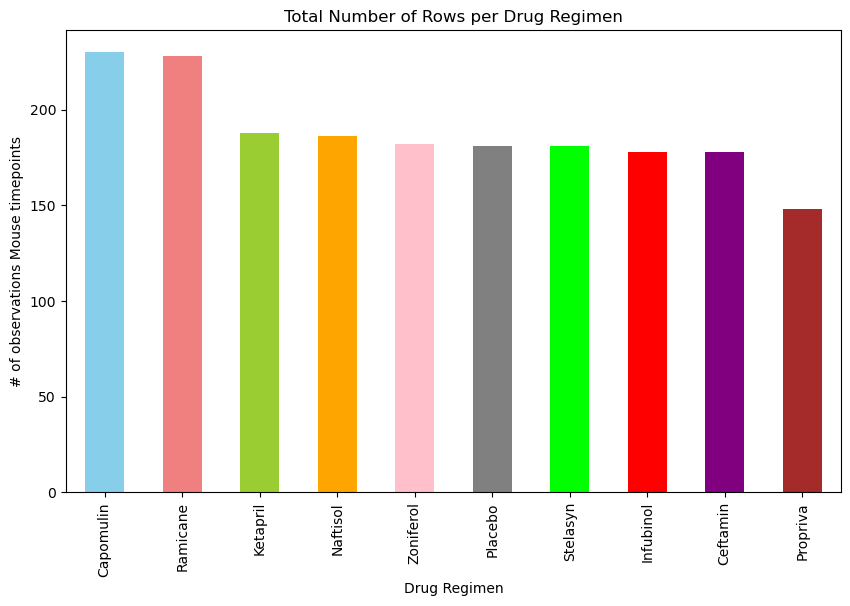

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of occurrences for each drug regimen
regimen_counts = deduplicated_data_a['Drug Regimen'].value_counts()

# Create a DataFrame from the counts
regimen_counts_df = pd.DataFrame(regimen_counts)
regimen_counts_df.columns = ['Number of Rows']

# Custom colors for bars
colors = ['skyblue', 'lightcoral', 'yellowgreen', 'orange', 'pink', 'grey', 'lime', 'red', 'purple', 'brown']

# Create the bar plot with custom colors
regimen_counts_df['Number of Rows'].plot.bar(figsize=(10, 6), color=colors)

# Set the plot title and axis labels
plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observations Mouse timepoints')

# Show the plot
plt.show()










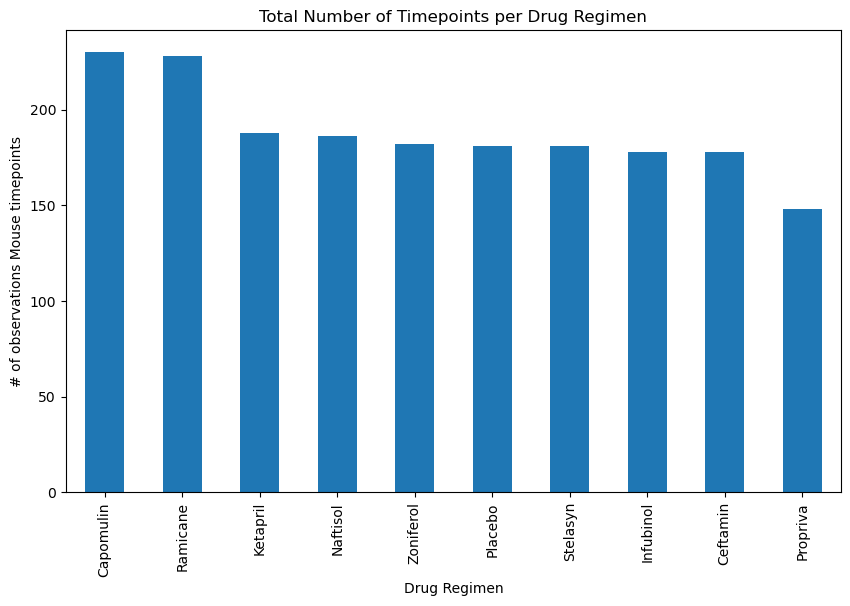

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = deduplicated_data_a['Drug Regimen'].value_counts()

# Create the bar plot
regimen_counts.plot(kind='bar', figsize=(10, 6))

# Set the plot title and axis labels
plt.title('Total Number of Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observations Mouse timepoints')

# Show the plot
plt.show()

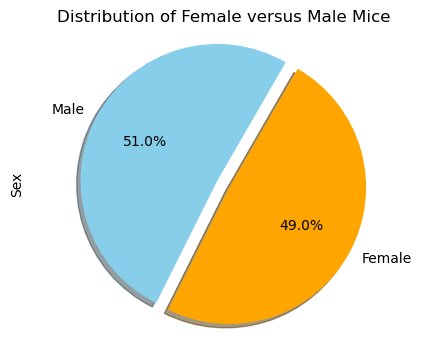

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the occurrences of each gender
gender_counts = deduplicated_data_a['Sex'].value_counts()

# Custom options
explode = [0.1, 0]  # Offset the first slice
colors = ['skyblue', 'orange']  # Custom colors
startangle = 60  # Start angle at 60 degrees (top right of the pie)
shadow = True  # Add shadow effect

# Create the pie plot with custom options
gender_counts.plot(kind='pie', figsize=(5, 4), autopct='%1.1f%%',
                   explode=explode, colors=colors, startangle=startangle,
                   shadow=shadow)

# Set the plot title
plt.title('Distribution of Female versus Male Mice')

# Set the aspect ratio to make the pie circular
plt.axis('equal')

# Show the plot
plt.show()


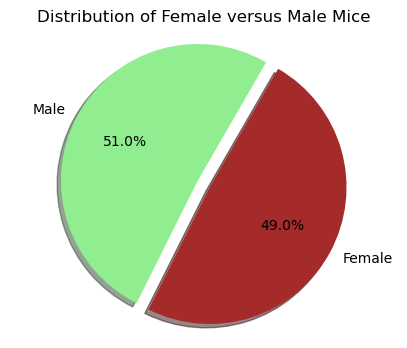

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the occurrences of each gender
gender_counts = deduplicated_data_a['Sex'].value_counts()

# Custom options
explode = [0.1, 0]  # Offset the first slice
colors = ['lightgreen', 'brown']  # Custom colors
startangle = 60  # Start angle at 60 degrees from top right to bottom left 
shadow = True  # Add shadow effect

# Custom figure size
fig, ax = plt.subplots(figsize=(5, 4))

# Create the pie plot with custom options
plt.pie(gender_counts, labels=gender_counts.index, explode=explode, colors=colors,
        startangle=startangle, autopct='%1.1f%%', shadow=shadow)

# Set the plot title
plt.title('Distribution of Female versus Male Mice')

# Set the aspect ratio to make the pie circular
plt.axis('equal')

# Show the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Define the four treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data for the four treatment regimens
filtered_data = deduplicated_data_a[deduplicated_data_a['Drug Regimen'].isin(treatment_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Merge the last timepoint data with the filtered data to get the final tumor volume
final_tumor_volume = pd.merge(filtered_data, last_timepoint, on=['Mouse ID', 'Timepoint'])[['Mouse ID', 'Tumor Volume (mm3)']]

# Print the final tumor volume for each mouse
print("Final Tumor Volume for Each Mouse:")
print(final_tumor_volume)


Final Tumor Volume for Each Mouse:
   Mouse ID  Tumor Volume (mm3)
0      k403           22.050126
1      s185           23.343598
2      x401           28.484033
3      m601           28.430964
4      g791           29.128472
..      ...                 ...
95     x822           61.386660
96     y163           67.685569
97     y769           68.594745
98     y865           64.729837
99     z581           62.754451

[100 rows x 2 columns]


In [24]:
# Define the list of treatment regimens
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store tumor volume data
tumor_vol_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on the current treatment regimen and get the tumor volumes
    tumor_volumes = deduplicated_data_a.loc[deduplicated_data_a['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add the tumor volume data to the list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR and determine potential outliers
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile, median, upper_quartile = quartiles.values
    iqr = upper_quartile - lower_quartile
    
    # Calculate the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Find the potential outliers
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print the treatment regimen, IQR, and potential outliers
    print(f"Treatment Regimen: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Potential Outliers: {outliers}")
    print()


Treatment Regimen: Capomulin
IQR: 7.314067135000002
Potential Outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64

Treatment Regimen: Ramicane
IQR: 8.325365415
Potential Outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64

Treatment Regimen: Infubinol
IQR: 10.002090667500006
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Treatment Regimen: Ceftamin
IQR: 9.593010457500007
Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



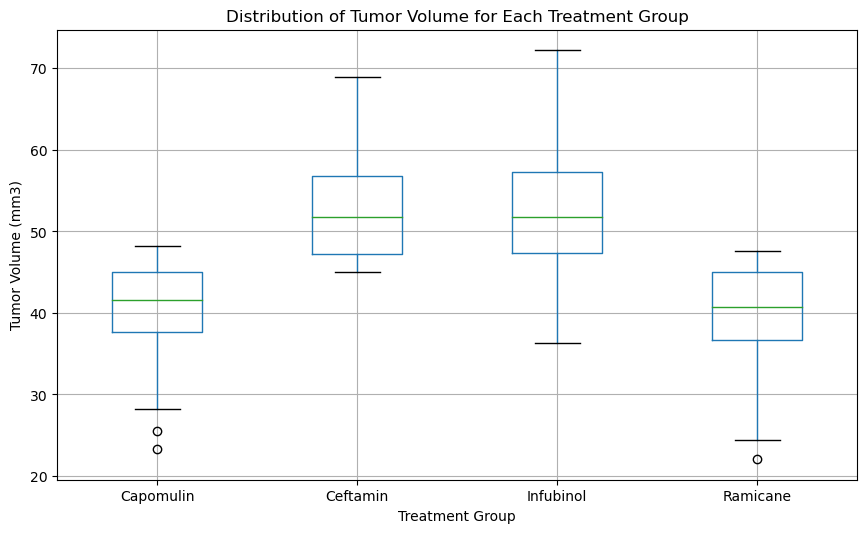

In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Define the treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data for the treatment regimens
filtered_data = mouse_combined_data[mouse_combined_data['Drug Regimen'].isin(treatment_regimens)]

# Create a box plot using pandas
filtered_data.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', figsize=(10, 6))

# Set the plot title and axis labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')

# Remove the redundant x-axis label
plt.suptitle('')

# Show the plot
plt.show()


## Line and Scatter Plots

C:\Users\bolit\AppData\Local\Temp\ipykernel_40688\1756344773.py:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(40, 49, 1)


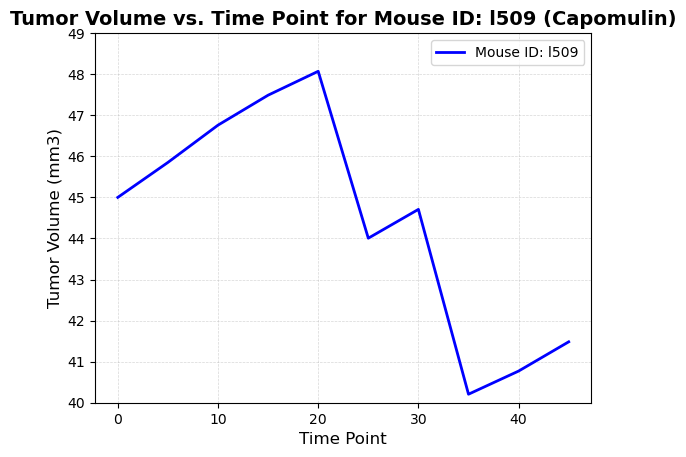

In [26]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'

# Filter the data for the chosen mouse treated with Capomulin
capomulin_data = mouse_combined_data.loc[(mouse_combined_data['Drug Regimen'] == 'Capomulin') & (mouse_combined_data['Mouse ID'] == mouse_id)]

# Create the line plot with custom options
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], linestyle='-', linewidth=2, color='blue')

# Set the plot title and axis labels with custom options
plt.title(f"Tumor Volume vs. Time Point for Mouse ID: {mouse_id} (Capomulin)", fontsize=14, fontweight='bold')
plt.xlabel('Time Point', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

# Set custom tick labels and limits
plt.xticks(range(0, 41, 10), rotation=360, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(40, 49, 1)

# Add a grid to the plot
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

# Add a legend
plt.legend(['Mouse ID: ' + mouse_id], loc='upper right', fontsize=10)

# Show the plot
plt.show()




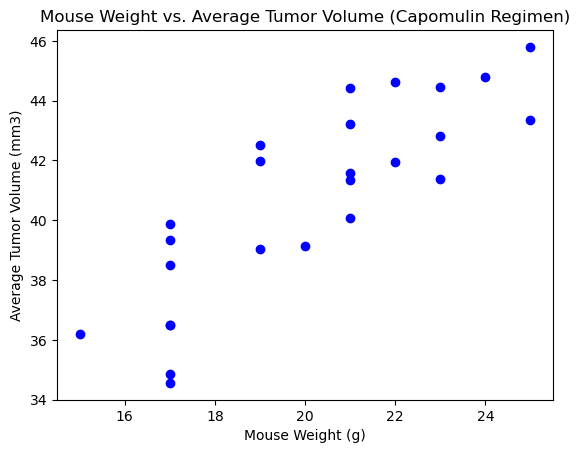

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = deduplicated_data_a[deduplicated_data_a['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().str[0]

# Create the scatter plot
plt.scatter(mouse_weights, avg_tumor_volume, marker='o', color='blue')

# Set the plot title and axis labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

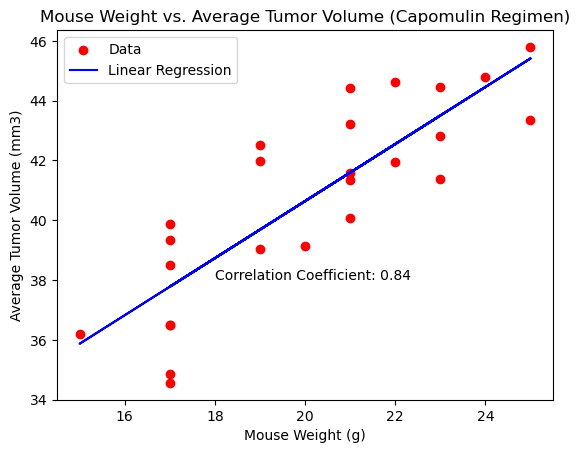

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Filter the data for the Capomulin regimen
capomulin_data = deduplicated_data_a[deduplicated_data_a['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique().str[0]

# Calculate the correlation coefficient
correlation_coef = np.corrcoef(mouse_weights, avg_tumor_volume)[0, 1]

# Perform linear regression
regress_result = linregress(mouse_weights, avg_tumor_volume)
slope = regress_result.slope
intercept = regress_result.intercept
regression_line = slope * mouse_weights + intercept

# Create the scatter plot with regression line
plt.scatter(mouse_weights, avg_tumor_volume, marker='o', color='red', label='Data')
plt.plot(mouse_weights, regression_line, color='blue', label='Linear Regression')

# Set the plot title, axis labels, and legend
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Display the correlation coefficient
plt.text(18, 38, f'Correlation Coefficient: {correlation_coef:.2f}', fontsize=10)

# Show the plot
plt.show()
